# Neural Networks in Machine Learning
"""
This notebook demonstrates how to implement and analyze **Neural Networks** for machine learning tasks using Python.

### Topics covered:
- Theory of Neural Networks
- Data preprocessing
- Building and training a Neural Network
- Visualizing performance and decision boundaries

## Theory of Neural Networks
A Neural Network is a supervised learning algorithm inspired by the structure and functioning of biological neural systems. It consists of layers of interconnected nodes (neurons) that process data and extract patterns.

### Key Concepts:
1. **Structure of a Neural Network**:
   - **Input Layer**: Accepts input features.
   - **Hidden Layers**: Processes inputs using weighted connections and activation functions.
   - **Output Layer**: Produces predictions or classifications.

2. **Neurons**:
   Each neuron calculates a weighted sum of its inputs and applies an activation function to introduce non-linearity:
   $$ z = \sum_{i=1}^{n} w_i x_i + b $$
   $$ a = \text{Activation Function}(z) $$

3. **Activation Functions**:
   - **Sigmoid**: For probabilities, \( \sigma(z) = \frac{1}{1 + e^{-z}} \)
   - **ReLU (Rectified Linear Unit)**: \( f(z) = \max(0, z) \), handles vanishing gradient problems.
   - **Tanh**: Scales between -1 and 1.
   - **Softmax**: For multi-class classification.

4. **Training a Neural Network**:
   - **Forward Propagation**: Input passes through the network to compute predictions.
   - **Loss Function**: Measures the error between predictions (\( \hat{y} \)) and true values (\( y \)).
     - **Common Loss Functions**:
       - Mean Squared Error (MSE) for regression.
       - Cross-Entropy Loss for classification.
   - **Backpropagation**: Adjusts weights by propagating the error backward using gradient descent.
   - **Optimization Algorithm**:
     - Gradient Descent, Adam, RMSprop, etc.

5. **Hyperparameters**:
   - Number of layers and neurons.
   - Learning rate.
   - Batch size and epochs.
   - Activation functions and optimization algorithms.

### Mathematical Formulation:
- **Forward Pass**:
  $$ a^{(l)} = f(W^{(l)}a^{(l-1)} + b^{(l)}) $$
  where \( l \) is the layer, \( W \) are weights, \( b \) are biases, and \( f \) is the activation function.

- **Loss Function**:
  For binary classification:
  $$ \mathcal{L}(y, \hat{y}) = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log \hat{y}_i + (1 - y_i) \log (1 - \hat{y}_i) \right) $$

- **Backpropagation**:
  $$ \frac{\partial \mathcal{L}}{\partial W} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial W} $$

### Advantages:
- Handles complex, non-linear relationships.
- Capable of feature extraction without manual intervention.
- Scalable to large datasets.

### Limitations:
- Requires significant computational resources.
- May overfit without regularization.
- Requires careful tuning of hyperparameters.

### Applications:
- Image recognition (e.g., object detection, facial recognition).
- Natural language processing (e.g., sentiment analysis, chatbots).
- Time-series forecasting (e.g., stock prices, weather prediction).
- Medical diagnosis (e.g., disease detection).

---
"""


#Step: 1. Downloading and Installing Required Libraries

In [34]:
# Step 1: Install Required Libraries
#!pip install numpy pandas matplotlib seaborn tensorflow scikit-learn pydot graphviz visualkeras

In [35]:
# Step 2: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
import visualkeras

# Step: 2. Data Preprocessing

In [36]:
# Step 3: Load the Dataset
# Replace 'heart.csv' with the path to your downloaded dataset
df = pd.read_csv('heart.xls')

# Step 4: Data Preprocessing
X = df.drop(columns=['target'])  # Features
y = df['target']                # Target variable (0 or 1)

In [37]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [38]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


In [40]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


# Step: 4. Data Splitting and Data Normalization

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step: 5. Data Visualization

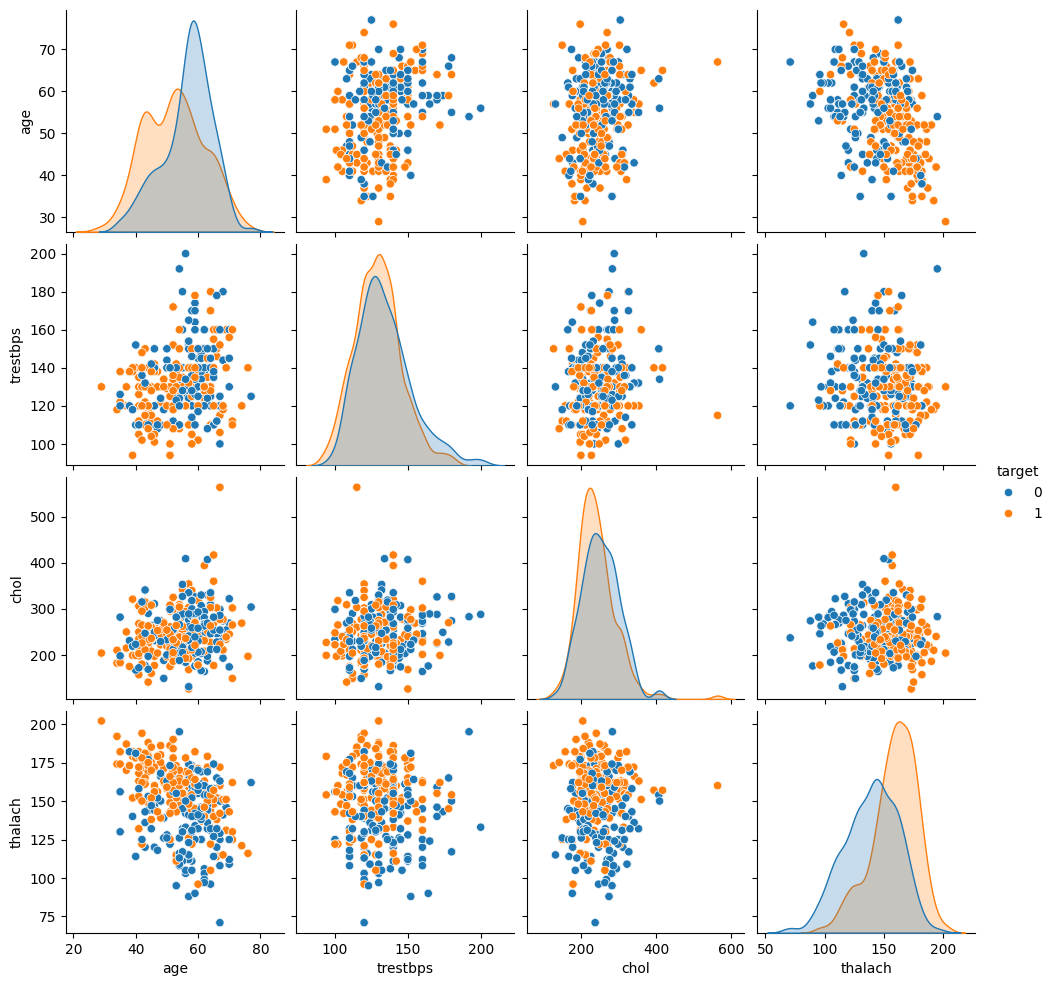

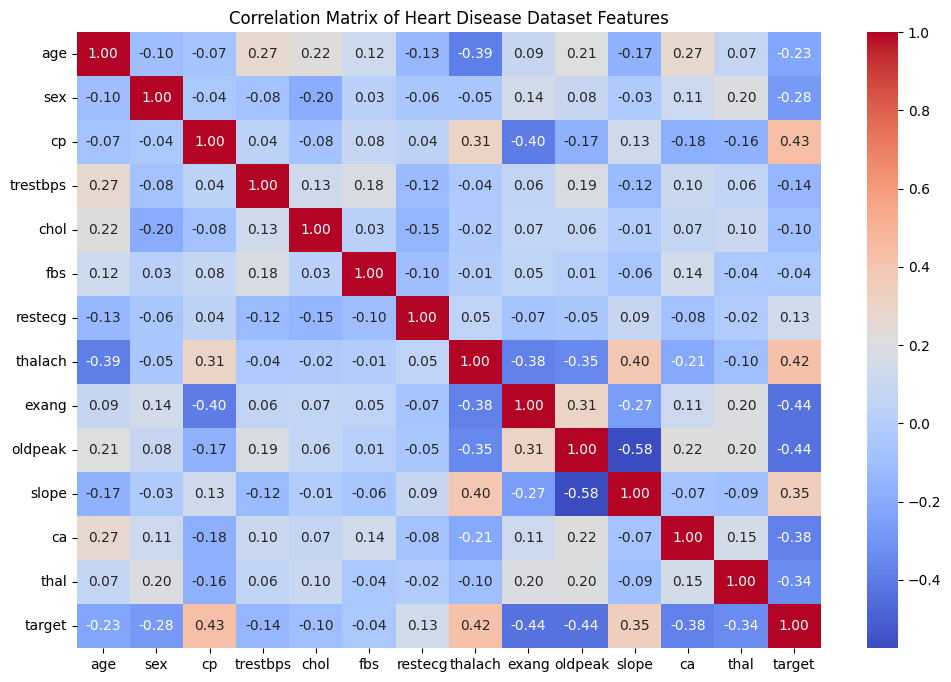

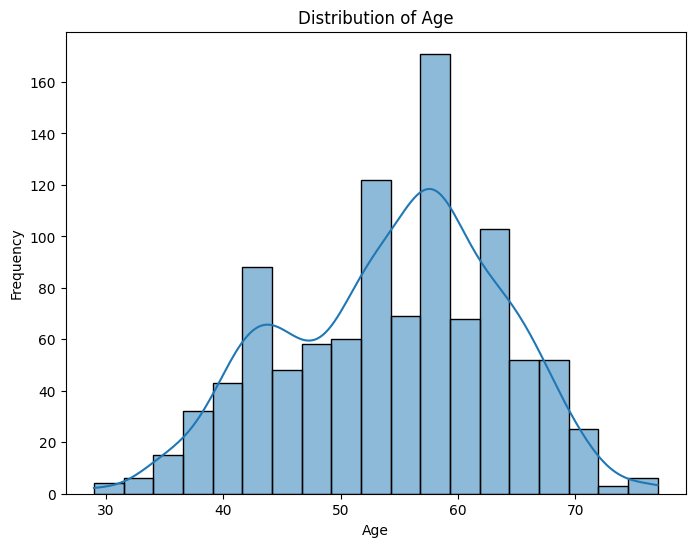

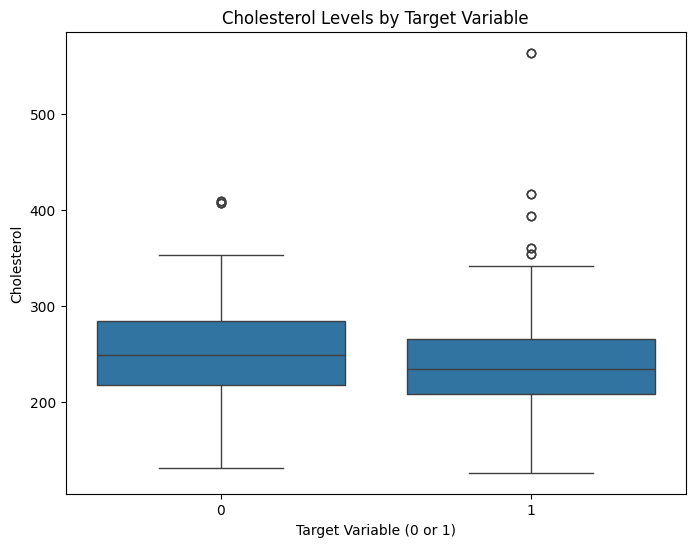

In [42]:
# data visualization

# Step 5: Data Visualization (Example: Pairplot)
sns.pairplot(df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach'])
plt.show()

# Example: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Heart Disease Dataset Features')
plt.show()

# Example: Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Boxplot of Cholesterol Levels
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='chol', data=df)
plt.title('Cholesterol Levels by Target Variable')
plt.xlabel('Target Variable (0 or 1)')
plt.ylabel('Cholesterol')
plt.show()

#Step: 6. Model Building

In [43]:
# Step 5: Model Building
# Define the Neural Network structure
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Input layer + 1st hidden layer
    Dense(16, activation='relu'),                             # 2nd hidden layer
    Dense(1, activation='sigmoid')                            # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Step: 7. Model Visualization

In [44]:
# Summary of the model
print("\nModel Summary:")
model.summary()



Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 993 (3.88 KB)

 Trainable params: 993 (3.88 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Visualizing the Model Structure with `plot_model`
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(filename='model_structure.png')

# Visualizing the Model with `visualkeras`
print("\nVisualizing Neural Network:")
visualkeras.layered_view(model, legend=True).show()

# Step 6: Train the Neural Network
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


Visualizing Neural Network:
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7238 - loss: 0.6049 - val_accuracy: 0.7361 - val_loss: 0.5668
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7948 - loss: 0.5150 - val_accuracy: 0.7639 - val_loss: 0.5218
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8221 - loss: 0.4493 - val_accuracy: 0.7917 - val_loss: 0.4845
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8561 - loss: 0.4140 - val_accuracy: 0.8056 - val_loss: 0.4596
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8173 - loss: 0.4155 - val_accuracy: 0.8194 - val_loss: 0.4456
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8635 - loss: 0.3554 - val_accuracy: 0.7986 - val_loss: 0.4343
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8795 - loss: 0.3396 - val_accuracy: 0.8056 - val_loss: 0.4290
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8948 - loss: 0.3036 - val_accuracy: 0.8125 - val_loss: 0.4269
Ep

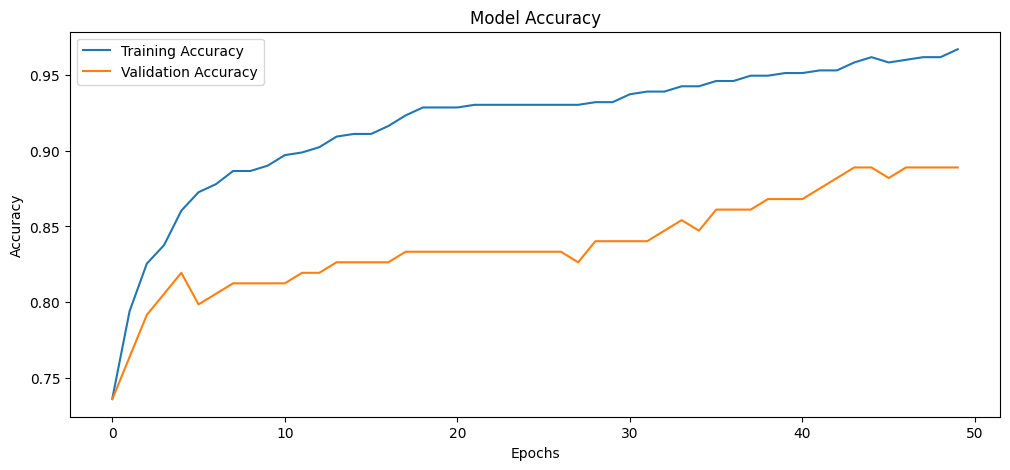

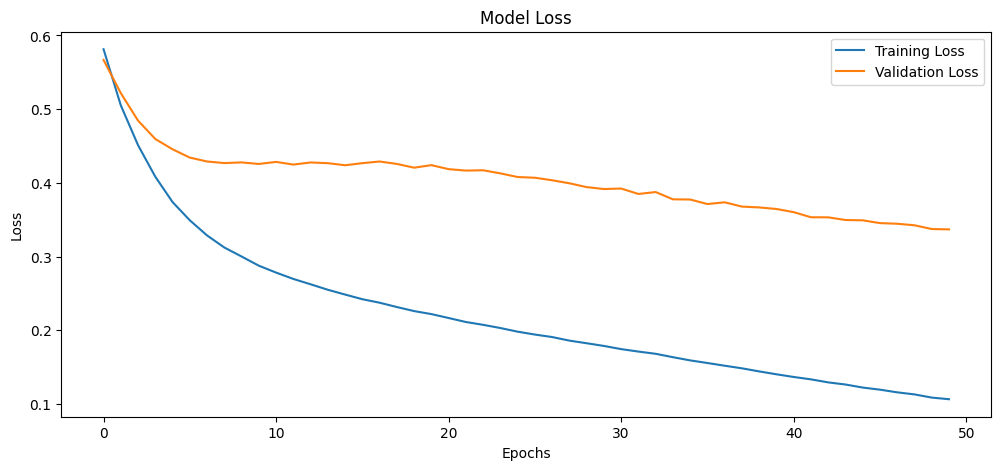

In [46]:
# Neural Networks in Machine Learning: Stepwise Implementation with Visualization
# Step 8: Data Visualization
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Step: 8. Model Evaluation

In [50]:
# Step 7: Model Evaluation
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")
overall_accuracy = accuracy_score(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       159
           1       0.85      0.93      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

Accuracy: 0.8896103896103896


In [53]:
# Step 7: Add User Input for Prediction
def user_input_prediction():
    print("\n--- Heart Disease Prediction System ---")
    print("Please enter the following details:")

    # Descriptions for choices
    chest_pain_desc = {
        0: "Typical Angina",
        1: "Atypical Angina",
        2: "Non-Anginal Pain",
        3: "Asymptomatic"
    }
    restecg_desc = {
        0: "Normal",
        1: "ST-T Wave Abnormality",
        2: "Left Ventricular Hypertrophy"
    }
    slope_desc = {
        0: "Upsloping",
        1: "Flat",
        2: "Downsloping"
    }
    thal_desc = {
        1: "Normal",
        2: "Fixed Defect",
        3: "Reversible Defect"
    }

    # Taking user inputs
    age = float(input("Age: "))
    sex = float(input("Sex (1 = Male, 0 = Female): "))
    print("\nChest Pain Type Options:")
    for key, val in chest_pain_desc.items():
        print(f"  {key}: {val}")
    cp = int(input("Chest Pain Type (0-3): "))

    trestbps = float(input("Resting Blood Pressure (mm Hg): "))
    chol = float(input("Serum Cholesterol (mg/dl): "))
    fbs = float(input("Fasting Blood Sugar > 120 mg/dl (1 = Yes, 0 = No): "))

    print("\nResting ECG Options:")
    for key, val in restecg_desc.items():
        print(f"  {key}: {val}")
    restecg = int(input("Resting ECG Results (0-2): "))

    thalach = float(input("Max Heart Rate Achieved: "))
    exang = float(input("Exercise Induced Angina (1 = Yes, 0 = No): "))
    oldpeak = float(input("ST Depression Induced by Exercise: "))

    print("\nSlope of Peak Exercise ST Segment Options:")
    for key, val in slope_desc.items():
        print(f"  {key}: {val}")
    slope = int(input("Slope of Peak Exercise ST Segment (0-2): "))


    # Number of Major Vessels (0-4)
    print("\nNumber of Major Vessels (0-4) Options:")
    print("  0: No major vessels are colored.")
    print("  1: One major vessel is colored.")
    print("  2: Two major vessels are colored.")
    print("  3: Three major vessels are colored.")
    print("  4: Four major vessels are colored.")
    ca = float(input("Number of Major Vessels (0-4): "))

    print("\nThalassemia Options:")
    for key, val in thal_desc.items():
        print(f"  {key}: {val}")
    thal = int(input("Thalassemia (1-3): "))

    # Combine inputs into a DataFrame
    user_data = pd.DataFrame({
        'age': [age],
        'sex': [sex],
        'cp': [cp],
        'trestbps': [trestbps],
        'chol': [chol],
        'fbs': [fbs],
        'restecg': [restecg],
        'thalach': [thalach],
        'exang': [exang],
        'oldpeak': [oldpeak],
        'slope': [slope],
        'ca': [ca],
        'thal': [thal]
    })

    # Standardize user input
    user_data_scaled = scaler.transform(user_data)

    # Predict the outcome
    prediction = model.predict(user_data_scaled)
    prediction = (prediction > 0.5).astype("int32")

    print("\n--- Prediction ---")
    if prediction == 1:
        print("You are likely to have heart disease. Please consult a doctor.")
    else:
        print("You are unlikely to have heart disease. Keep maintaining a healthy lifestyle!")

    print("\n--- Accuracy ---")
    print(f"Model Prediction Accuracy: {overall_accuracy:.2f}")

# Step 8: Call User Input Function
user_input_prediction()


--- Heart Disease Prediction System ---
Please enter the following details:
Age: 22
Sex (1 = Male, 0 = Female): 1

Chest Pain Type Options:
  0: Typical Angina
  1: Atypical Angina
  2: Non-Anginal Pain
  3: Asymptomatic
Chest Pain Type (0-3): 3
Resting Blood Pressure (mm Hg): 120
Serum Cholesterol (mg/dl): 130
Fasting Blood Sugar > 120 mg/dl (1 = Yes, 0 = No): 2

Resting ECG Options:
  0: Normal
  1: ST-T Wave Abnormality
  2: Left Ventricular Hypertrophy
Resting ECG Results (0-2): 2
Max Heart Rate Achieved: 230
Exercise Induced Angina (1 = Yes, 0 = No): 2
ST Depression Induced by Exercise: 2

Slope of Peak Exercise ST Segment Options:
  0: Upsloping
  1: Flat
  2: Downsloping
Slope of Peak Exercise ST Segment (0-2): 0

Number of Major Vessels (0-4) Options:
  0: No major vessels are colored.
  1: One major vessel is colored.
  2: Two major vessels are colored.
  3: Three major vessels are colored.
  4: Four major vessels are colored.
Number of Major Vessels (0-4): 0

Thalassemia Opt